In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading the dataset
wine = pd.read_csv('/content/drive/MyDrive/SKILL_DEV/Machine Learning/422 ML/datasets/wine.csv')
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad


In [ ]:
#checking fo null values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#Encoding the categorical feature
enc = LabelEncoder()

# Apply the encoding to the "quality" column
wine['quality'] = enc.fit_transform(wine['quality'])


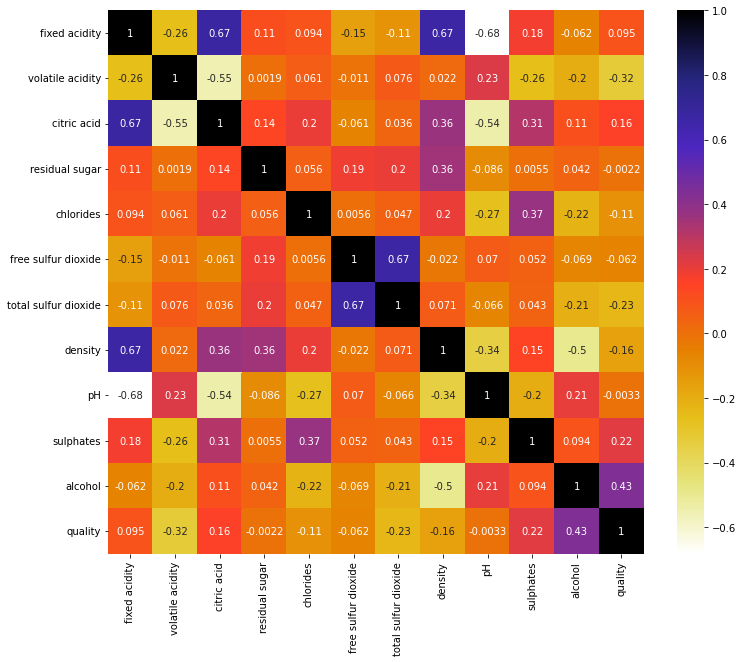

In [ ]:
#Using Pearson Correlation to see correlation among features
plt.figure(figsize=(12,10))
cor = wine.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [ ]:
corr_features = correlation(wine, 0.68) #setting a correlation threshold
len(set(corr_features))

1

In [ ]:
corr_features

{'pH'}

In [ ]:
wine = wine.drop(corr_features, axis=1)


In [ ]:
# separate dataset into train and test
X = wine.iloc[:,:-1]
Y = wine.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=29, shuffle=True)

In [ ]:
#preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_PCA = X_train_scaled
X_test_scaled = scaler.transform(X_test)
X_test_PCA = X_test_scaled

In [ ]:
#SVM
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [ ]:
train_svm_acc = svc.score(X_train_scaled, y_train)
print("Training accuracy of the model is {:.2f}".format(train_svm_acc))
svm_acc = svc.score(X_test_scaled, y_test)
print("Testing accuracy of the model is {:.2f}".format(svm_acc))

Training accuracy of the model is 0.73
Testing accuracy of the model is 0.78


In [ ]:
predictions = svc.predict(X_test_scaled)
print(predictions)

[0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0
 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1
 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0
 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1
 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1
 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0
 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1]


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
train_rndm_acc = rfc.score(X_train_scaled, y_train)
print("Training accuracy of the model is {:.2f}".format(train_rndm_acc))
rndm_acc = rfc.score(X_test_scaled, y_test)
print("Testing accuracy of the model is {:.2f}".format(rndm_acc))

Training accuracy of the model is 1.00
Testing accuracy of the model is 0.81


In [ ]:
#Neural Network
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

In [ ]:
nnc.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=7, max_iter=10000)

In [ ]:
train_nnc_acc = nnc.score(X_train_scaled, y_train)
print("The Training accuracy of the model is {:.2f}".format(train_nnc_acc))
nnc_acc = nnc.score(X_test_scaled, y_test)
print("The Testing accuracy of the model is {:.2f}".format(nnc_acc))

The Training accuracy of the model is 0.74
The Testing accuracy of the model is 0.77


In [ ]:
predictions = nnc.predict(X_test_scaled)
print(predictions)

[1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1
 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0
 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1
 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1
 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0
 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0
 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1]


# **Now performing with PCA**

In [ ]:

# importing or loading the dataset
dataset = pd.read_csv('/content/drive/MyDrive/SKILL_DEV/Machine Learning/422 ML/datasets/wine.csv')
 
# distributing the dataset into two components X and Y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train_PCA = sc.fit_transform(X_train_PCA)
X_test_PCA = sc.transform(X_test_PCA)

In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components=6)
 
X_train_PCA = pca.fit_transform(X_train_PCA)
X_test_PCA = pca.transform(X_test_PCA)
 
explained_variance = pca.explained_variance_ratio_

In [ ]:
#SVM after PCA
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train_PCA, y_train_PCA)

SVC(kernel='linear')

In [ ]:
train_svm_acc_PCA = svc.score(X_train_PCA, y_train_PCA)
print("Training accuracy of the model is {:.2f}".format(train_svm_acc_PCA))
svm_acc_PCA = svc.score(X_test_PCA, y_test_PCA)
print("Testing accuracy of the model is {:.2f}".format(svm_acc_PCA))

Training accuracy of the model is 0.73
Testing accuracy of the model is 0.74


In [ ]:
#Random Forest after PCA
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train_PCA, y_train_PCA)

RandomForestClassifier(n_estimators=50)

In [ ]:
train_rndm_acc_PCA = rfc.score(X_train_PCA, y_train_PCA)
print("Training accuracy of the model is {:.2f}".format(train_rndm_acc_PCA))
rndm_acc_PCA = rfc.score(X_test_PCA, y_test_PCA)
print("Testing accuracy of the model is {:.2f}".format(rndm_acc_PCA))

Training accuracy of the model is 1.00
Testing accuracy of the model is 0.78


In [ ]:
#Neural Network after PCA
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

In [ ]:
nnc.fit(X_train_PCA, y_train_PCA)

MLPClassifier(hidden_layer_sizes=7, max_iter=10000)

In [ ]:
train_nnc_acc_PCA = nnc.score(X_train_PCA, y_train_PCA)
print("Training accuracy of the model is {:.2f}".format(train_nnc_acc_PCA))
nnc_acc_PCA = nnc.score(X_test_PCA, y_test_PCA)
print("Testing accuracy of the model is {:.2f}".format(nnc_acc_PCA))

Training accuracy of the model is 0.75
Testing accuracy of the model is 0.73


In [ ]:
predictions = nnc.predict(X_test_PCA)
print(predictions)

['good' 'bad' 'good' 'bad' 'good' 'bad' 'bad' 'good' 'bad' 'bad' 'bad'
 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'good' 'good' 'bad' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good'
 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'bad' 'bad' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good'
 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good'
 'bad' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'good' 'good' 'bad'
 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'bad'
 'bad' 'bad' 'bad' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'bad'
 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'bad'
 'good' 'bad' 'good' 'bad' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'bad'
 'good' 'bad' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'bad'
 'good' 'good' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'bad' 'bad'
 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'goo

In [ ]:
plt.rcParams.update({'figure.figsize':(18,5), 'figure.dpi':100})

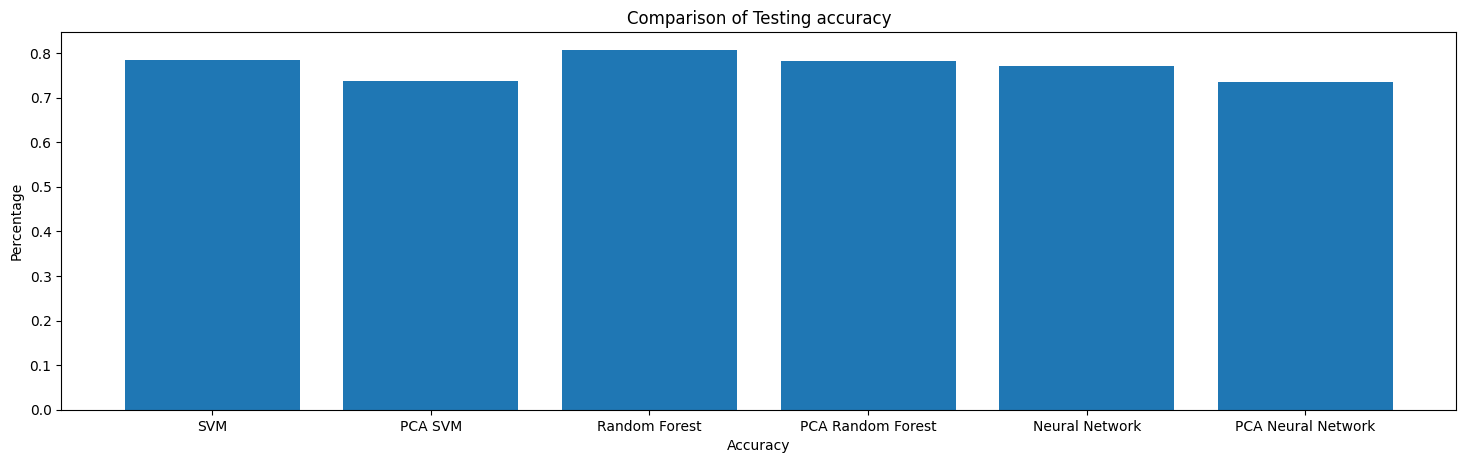

In [ ]:
x = ['SVM','PCA SVM', 'Random Forest', 'PCA Random Forest', 'Neural Network', 'PCA Neural Network']
y = [svm_acc, svm_acc_PCA, rndm_acc, rndm_acc_PCA, nnc_acc, nnc_acc_PCA]
# print(y)
plt.bar(x, y)
plt.xlabel("Accuracy")
plt.ylabel('Percentage')
plt.title('Comparison of Testing accuracy')
plt.show()

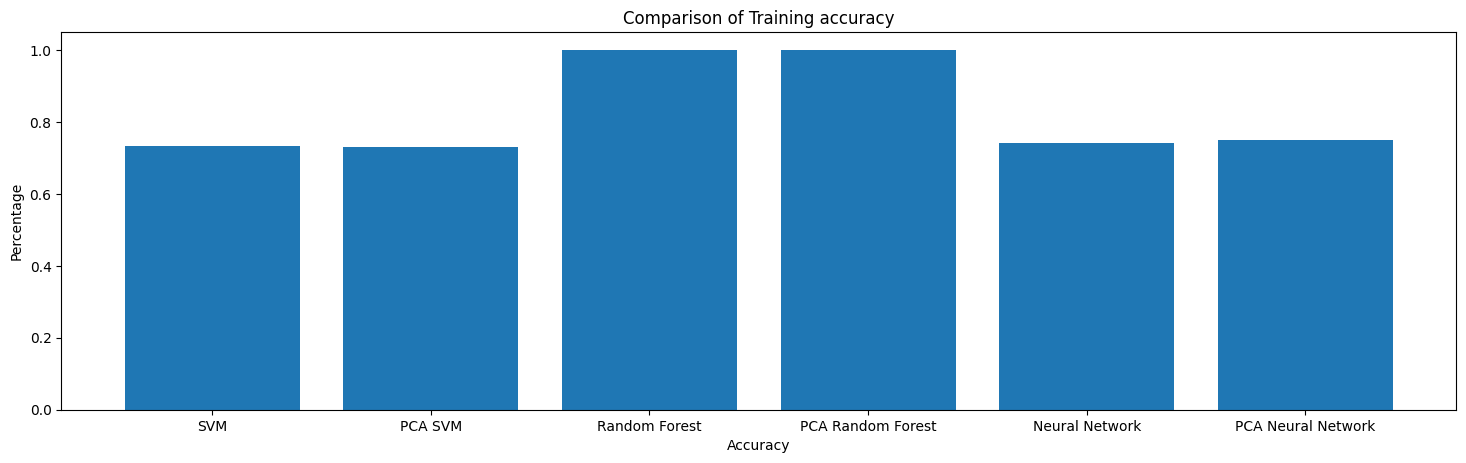

In [ ]:
x = ['SVM','PCA SVM', 'Random Forest', 'PCA Random Forest', 'Neural Network', 'PCA Neural Network']
y = [train_svm_acc, train_svm_acc_PCA, train_rndm_acc, train_rndm_acc_PCA, train_nnc_acc, train_nnc_acc_PCA]
# print(y)
plt.bar(x, y)
plt.xlabel("Accuracy")
plt.ylabel('Percentage')
plt.title('Comparison of Training accuracy')
plt.show()